# Demo of mpld3

This notebook gives a brief overview of [mpld3](http://mpld3.github.io), a package which allows seamless visualization of matplotlib plots using HTML, Javascript, and the [D3js](http://d3js.org/) package.

One of the nicest parts of the IPython notebook is the ability to embed figures inline with code.  For example, we can quickly create a scatter plot as so:

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



In [24]:
import mpld3
mpld3.enable_notebook()

TypeError: Object of type 'ndarray' is not JSON serializable

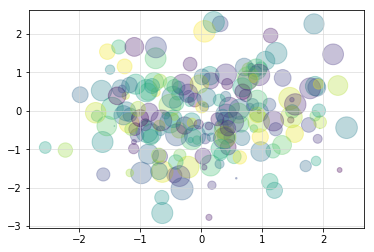

In [27]:
# Scatter points
fig, ax = plt.subplots()
np.random.seed(0)
x, y = np.random.normal(size=(2, 200))
color, size = np.random.random((2, 200))

ax.scatter(x, y, c=color, s=500 * size, alpha=0.3)
ax.grid(color='lightgray', alpha=0.7)

In [28]:
import mpld3
mpld3.enable_notebook()

A weakness quickly becomes clear, however: the embedded figure is a simple static PNG image.

This is where mpld3 comes in. Using the simple ``mpld3.display()`` command, we can create a fully interactive visualization of the same plot:

In [3]:
from django.core import serializers
data = serializers.serialize("json", OrgInvite.objects.filter(token=100))

NameError: name 'OrgInvite' is not defined

In [6]:
import mpld3
mpld3.display(fig)

TypeError: Object of type 'ndarray' is not JSON serializable

Notice that as you hover over the plot, a toolbar appears in the lower left. This has tools to enable panning and zooming, and a button to reset the view once you've explored the plot.

If you'd like to use mpld3 by default for every figure you generate, you can call the following command:

In [8]:
mpld3.enable_notebook()

## Other Plot Types

Nearly any type of plot matplotlib can do, mpld3 can visualize as well. Below are some examples:

### A Histogram

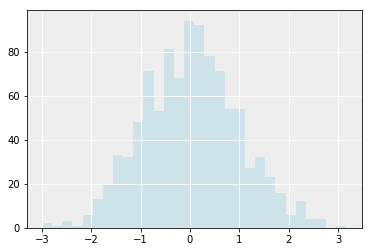

In [10]:
# Histogram with modified axes/grid
fig = plt.figure()

ax = fig.add_subplot(111, facecolor='#EEEEEE')
ax.grid(color='white', linestyle='solid')

x = np.random.normal(size=1000)
ax.hist(x, 30, histtype='stepfilled', fc='lightblue', alpha=0.5);

### Line Plots with Legend

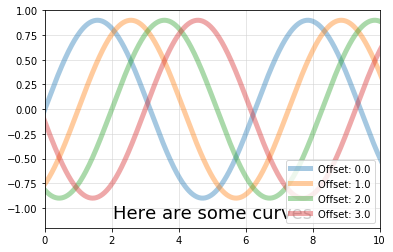

In [11]:
# Draw lines
fig, ax = plt.subplots()
x = np.linspace(-5, 15, 1000)
for offset in np.linspace(0, 3, 4):
    ax.plot(x, 0.9 * np.sin(x - offset), lw=5, alpha=0.4,
            label="Offset: {0}".format(offset))
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.0)
ax.text(5, -1.1, "Here are some curves", size=18, ha='center')
ax.grid(color='lightgray', alpha=0.7)
ax.legend()

### Multiple Subplots with linked axes

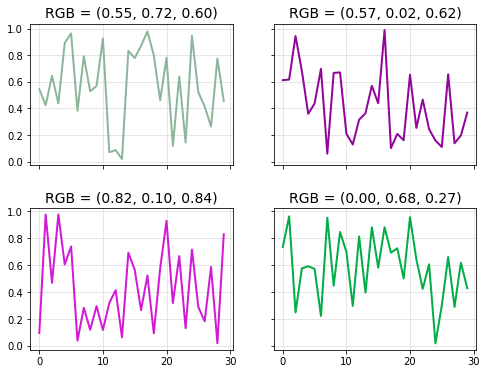

In [12]:
# multiple subplots, shared axes
fig, ax = plt.subplots(2, 2, figsize=(8, 6),sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.3)

np.random.seed(0)

for axi in ax.flat:
    color = np.random.random(3)
    axi.plot(np.random.random(30), lw=2, c=color)
    axi.set_title("RGB = ({0:.2f}, {1:.2f}, {2:.2f})".format(*color),
                  size=14)
    axi.grid(color='lightgray', alpha=0.7)

## Plugins

One of the key features of mpld3 is the plugin framework. Plugins are a way to specify additional interactivity for your plots. A number of plugins are built-in, and it is also possible to define new, custom plugins for nearly limitless interactive behaviors. For example, here is the built-in Linked Brushing plugin that allows exploration of multi-dimensional datasets:

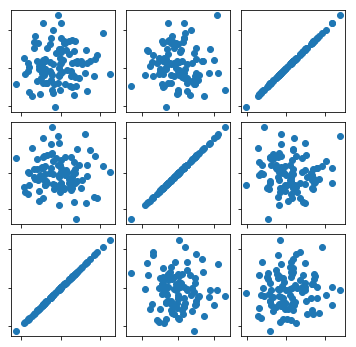

In [4]:
from mpld3 import plugins

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax[::-1]

X = np.random.normal(size=(3, 100))
for i in range(3):
    for j in range(3):
        ax[i, j].xaxis.set_major_formatter(plt.NullFormatter())
        ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
        points = ax[i, j].scatter(X[j], X[i])
        
plugins.connect(fig, plugins.LinkedBrush(points))

Selecting points with the brush lets you quickly explore the relationships between the points.

## For More Information

More examples, documentation, and information can be found on the [mpld3 website](http://mpld3.github.io).  See especially the [Example Gallery](http://mpld3.github.io/examples/index.html) and the [Notebook Gallery](http://mpld3.github.io/notebooks/index.html).  If you are interested in contributing, the source of mpld3 can be found on [GitHub](http://github.com/jakevdp/mpld3).